In [1]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_obesity_world = pd.read_csv ('../data/obesity_world_original_clean.csv')

In [3]:
df_obesity_world

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
0,1975,EMR,Eastern Mediterranean,AFG,Afghanistan,0.5
1,1976,EMR,Eastern Mediterranean,AFG,Afghanistan,0.5
2,1977,EMR,Eastern Mediterranean,AFG,Afghanistan,0.6
3,1978,EMR,Eastern Mediterranean,AFG,Afghanistan,0.6
4,1979,EMR,Eastern Mediterranean,AFG,Afghanistan,0.6
...,...,...,...,...,...,...
8017,2012,AFR,Africa,ZWE,Zimbabwe,14.3
8018,2013,AFR,Africa,ZWE,Zimbabwe,14.6
8019,2014,AFR,Africa,ZWE,Zimbabwe,14.9
8020,2015,AFR,Africa,ZWE,Zimbabwe,15.2


In [4]:
df_obesity_world.sort_values(by = ['Obesity_Rate'], ascending=False)

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
4997,2016,WPR,Western Pacific,NRU,Nauru,61.0
4996,2015,WPR,Western Pacific,NRU,Nauru,60.7
4995,2014,WPR,Western Pacific,NRU,Nauru,60.3
4994,2013,WPR,Western Pacific,NRU,Nauru,60.0
4993,2012,WPR,Western Pacific,NRU,Nauru,59.6
...,...,...,...,...,...,...
7863,1984,WPR,Western Pacific,VNM,Viet Nam,0.2
7864,1985,WPR,Western Pacific,VNM,Viet Nam,0.2
547,1976,SEAR,South-East Asia,BGD,Bangladesh,0.2
7855,1976,WPR,Western Pacific,VNM,Viet Nam,0.1


In [5]:
pd.Series(df_obesity_world['Country'].unique())

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
186      Venezuela
187       Viet Nam
188          Yemen
189         Zambia
190       Zimbabwe
Length: 191, dtype: object

In [6]:
print(sorted(df_obesity_world['Country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [7]:
df_US = df_obesity_world[(df_obesity_world['Country'] == 'United States')]

In [8]:
df_US

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
7644,1975,AMR,Americas,USA,United States,11.9
7645,1976,AMR,Americas,USA,United States,12.2
7646,1977,AMR,Americas,USA,United States,12.6
7647,1978,AMR,Americas,USA,United States,13.0
7648,1979,AMR,Americas,USA,United States,13.3
7649,1980,AMR,Americas,USA,United States,13.7
7650,1981,AMR,Americas,USA,United States,14.1
7651,1982,AMR,Americas,USA,United States,14.6
7652,1983,AMR,Americas,USA,United States,15.0
7653,1984,AMR,Americas,USA,United States,15.5


In [9]:
df_IN = df_obesity_world[(df_obesity_world['Country'] == 'India')]

In [10]:
df_IN

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
3192,1975,SEAR,South-East Asia,IND,India,0.3
3193,1976,SEAR,South-East Asia,IND,India,0.4
3194,1977,SEAR,South-East Asia,IND,India,0.4
3195,1978,SEAR,South-East Asia,IND,India,0.4
3196,1979,SEAR,South-East Asia,IND,India,0.4
3197,1980,SEAR,South-East Asia,IND,India,0.5
3198,1981,SEAR,South-East Asia,IND,India,0.5
3199,1982,SEAR,South-East Asia,IND,India,0.5
3200,1983,SEAR,South-East Asia,IND,India,0.6
3201,1984,SEAR,South-East Asia,IND,India,0.6


In [11]:
df_CH = df_obesity_world[(df_obesity_world['Country'] == 'China')]

In [12]:
df_CH

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
1470,1975,WPR,Western Pacific,CHN,China,0.5
1471,1976,WPR,Western Pacific,CHN,China,0.5
1472,1977,WPR,Western Pacific,CHN,China,0.5
1473,1978,WPR,Western Pacific,CHN,China,0.6
1474,1979,WPR,Western Pacific,CHN,China,0.6
1475,1980,WPR,Western Pacific,CHN,China,0.6
1476,1981,WPR,Western Pacific,CHN,China,0.7
1477,1982,WPR,Western Pacific,CHN,China,0.7
1478,1983,WPR,Western Pacific,CHN,China,0.8
1479,1984,WPR,Western Pacific,CHN,China,0.8


In [13]:
df_EU = df_obesity_world[(df_obesity_world['Region'] == 'European Union')]

In [14]:
df_EU.sort_values(by = ['Obesity_Rate'], ascending = False)

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
7391,2016,EUR,European Union,TUR,Turkey,32.1
7390,2015,EUR,European Union,TUR,Turkey,31.5
7389,2014,EUR,European Union,TUR,Turkey,30.8
7388,2013,EUR,European Union,TUR,Turkey,30.2
7387,2012,EUR,European Union,TUR,Turkey,29.5
...,...,...,...,...,...,...
7017,1978,EUR,European Union,TJK,Tajikistan,4.4
7728,1975,EUR,European Union,UZB,Uzbekistan,4.4
7016,1977,EUR,European Union,TJK,Tajikistan,4.3
7015,1976,EUR,European Union,TJK,Tajikistan,4.2


In [15]:
df_FR = df_obesity_world[(df_obesity_world['Country'] == 'France')]

In [16]:
df_FR

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
2520,1975,EUR,European Union,FRA,France,8.8
2521,1976,EUR,European Union,FRA,France,9.1
2522,1977,EUR,European Union,FRA,France,9.3
2523,1978,EUR,European Union,FRA,France,9.5
2524,1979,EUR,European Union,FRA,France,9.8
2525,1980,EUR,European Union,FRA,France,10.0
2526,1981,EUR,European Union,FRA,France,10.3
2527,1982,EUR,European Union,FRA,France,10.5
2528,1983,EUR,European Union,FRA,France,10.7
2529,1984,EUR,European Union,FRA,France,11.0


In [17]:
df_obesity_world

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
0,1975,EMR,Eastern Mediterranean,AFG,Afghanistan,0.5
1,1976,EMR,Eastern Mediterranean,AFG,Afghanistan,0.5
2,1977,EMR,Eastern Mediterranean,AFG,Afghanistan,0.6
3,1978,EMR,Eastern Mediterranean,AFG,Afghanistan,0.6
4,1979,EMR,Eastern Mediterranean,AFG,Afghanistan,0.6
...,...,...,...,...,...,...
8017,2012,AFR,Africa,ZWE,Zimbabwe,14.3
8018,2013,AFR,Africa,ZWE,Zimbabwe,14.6
8019,2014,AFR,Africa,ZWE,Zimbabwe,14.9
8020,2015,AFR,Africa,ZWE,Zimbabwe,15.2


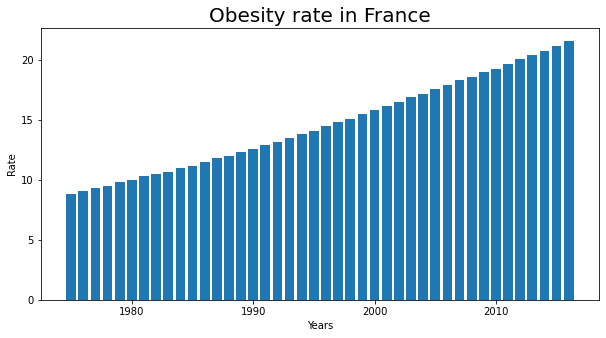

In [18]:
plt.figure(figsize=(10,5))
plt.bar(df_FR.Year, df_FR.Obesity_Rate, linewidth=2)
plt.title('Obesity rate in France', size = 20)
plt.xlabel('Years')
plt.ylabel('Rate')
plt.show()

In [19]:
df_analysis = pd.read_csv ('../data/analysis.csv')

In [20]:
df_analysis

,Country Name,Country Code,Years,population,Country_Code,Country_Name,Market_Year,Unit_Description,Value,Value_grams,Value_grams_daily,per_capita_gr_daily
0,Afghanistan,AFG,2020,38928341.0,AF,Afghanistan,2020.0,(1000 MT),0.0,0.0,0.000000,0.000000
1,Afghanistan,AFG,2019,38041754.0,AF,Afghanistan,2019.0,(1000 MT),0.0,0.0,0.000000,0.000000
2,Afghanistan,AFG,2018,37172386.0,AF,Afghanistan,2018.0,(1000 MT),0.0,0.0,0.000000,0.000000
3,Afghanistan,AFG,2017,36296400.0,AF,Afghanistan,2017.0,(1000 MT),31.0,31000000.0,84931.506849,2.339943
4,Afghanistan,AFG,2016,35383128.0,AF,Afghanistan,2016.0,(1000 MT),55.0,55000000.0,150684.931507,4.258666
...,...,...,...,...,...,...,...,...,...,...,...,...
11559,Zimbabwe,ZWE,1976,6502569.0,RH,Zimbabwe,1976.0,(1000 MT),128.0,128000000.0,350684.931507,53.930213
11560,Zimbabwe,ZWE,1975,6293875.0,RH,Zimbabwe,1975.0,(1000 MT),125.0,125000000.0,342465.753425,54.412544
11561,Zimbabwe,ZWE,1974,6085074.0,RH,Zimbabwe,1974.0,(1000 MT),135.0,135000000.0,369863.013699,60.782008
11562,Zimbabwe,ZWE,1973,5877726.0,RH,Zimbabwe,1973.0,(1000 MT),100.0,100000000.0,273972.602740,46.612007


In [21]:
print((df_analysis['Country_Name'].unique()))

['Afghanistan' nan 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belize' 'Benin' 'Bermuda' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'European Union' 'Fiji' 'Finland' 'French Polynesia' 'Gabon'
 'Gambia, The' 'Georgia' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iraq' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait'
 'Latvia' 'Lebanon' 'Liberia' 'Libya' 'Lithuania' 'Madagascar' 'Malawi'
 'Malaysia' 'Maldives' 'Mali' 'M

In [22]:
print((df_obesity_world['Country'].unique()))

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Democratic Republic of the Congo' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhs

In [23]:
df_analysis.head(1)

,Country Name,Country Code,Years,population,Country_Code,Country_Name,Market_Year,Unit_Description,Value,Value_grams,Value_grams_daily,per_capita_gr_daily
0,Afghanistan,AFG,2020,38928341.0,AF,Afghanistan,2020.0,(1000 MT),0.0,0.0,0.0,0.0


In [24]:
df_obesity_world.head(1)

,Year,Region_Code,Region,Country_Code,Country,Obesity_Rate
0,1975,EMR,Eastern Mediterranean,AFG,Afghanistan,0.5


In [25]:
df_merge2 = pd.merge(df_analysis, df_obesity_world, left_on = ['Country Code', 'Market_Year'], right_on = ['Country_Code', 'Year' ], how = 'left')

In [26]:
df_merge2.head(20)

,Country Name,Country Code,Years,population,Country_Code_x,Country_Name,Market_Year,Unit_Description,Value,Value_grams,Value_grams_daily,per_capita_gr_daily,Year,Region_Code,Region,Country_Code_y,Country,Obesity_Rate
0,Afghanistan,AFG,2020,38928341.0,AF,Afghanistan,2020.0,(1000 MT),0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2019,38041754.0,AF,Afghanistan,2019.0,(1000 MT),0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2018,37172386.0,AF,Afghanistan,2018.0,(1000 MT),0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2017,36296400.0,AF,Afghanistan,2017.0,(1000 MT),31.0,31000000.0,84931.506849,2.339943,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2016,35383128.0,AF,Afghanistan,2016.0,(1000 MT),55.0,55000000.0,150684.931507,4.258666,2016.0,EMR,Eastern Mediterranean,AFG,Afghanistan,5.5
5,Afghanistan,AFG,2015,34413603.0,AF,Afghanistan,2015.0,(1000 MT),20.0,20000000.0,54794.520548,1.592234,2015.0,EMR,Eastern Mediterranean,AFG,Afghanistan,5.2
6,Afghanistan,AFG,2014,33370794.0,AF,Afghanistan,2014.0,(1000 MT),54.0,54000000.0,147945.205479,4.433374,2014.0,EMR,Eastern Mediterranean,AFG,Afghanistan,4.9
7,Afghanistan,AFG,2013,32269589.0,AF,Afghanistan,2013.0,(1000 MT),20.0,20000000.0,54794.520548,1.698024,2013.0,EMR,Eastern Mediterranean,AFG,Afghanistan,4.7
8,Afghanistan,AFG,2012,31161376.0,AF,Afghanistan,2012.0,(1000 MT),24.0,24000000.0,65753.424658,2.110094,2012.0,EMR,Eastern Mediterranean,AFG,Afghanistan,4.4
9,Afghanistan,AFG,2011,30117413.0,AF,Afghanistan,2011.0,(1000 MT),30.0,30000000.0,82191.780822,2.729045,2011.0,EMR,Eastern Mediterranean,AFG,Afghanistan,4.2


In [28]:
df_merge_US = df_merge2[(df_merge2['Country'] == 'United States')]

In [32]:
df_merge_US.head()

,Country Name,Country Code,Years,population,Country_Code_x,Country_Name,Market_Year,Unit_Description,Value,Value_grams,Value_grams_daily,per_capita_gr_daily,Year,Region_Code,Region,Country_Code_y,Country,Obesity_Rate
10980,United States,USA,2016,322941311.0,US,United States,2016.0,(1000 MT),10779.0,1.077900e+10,2.953151e+07,91.445429,2016.0,AMR,Americas,USA,United States,36.2
10981,United States,USA,2015,320635163.0,US,United States,2015.0,(1000 MT),10785.0,1.078500e+10,2.954795e+07,92.154413,2015.0,AMR,Americas,USA,United States,35.6
10982,United States,USA,2014,318301008.0,US,United States,2014.0,(1000 MT),10722.0,1.072200e+10,2.937534e+07,92.287934,2014.0,AMR,Americas,USA,United States,34.9
10983,United States,USA,2013,315993715.0,US,United States,2013.0,(1000 MT),10421.0,1.042100e+10,2.855068e+07,90.352066,2013.0,AMR,Americas,USA,United States,34.3
10984,United States,USA,2012,313830990.0,US,United States,2012.0,(1000 MT),10106.0,1.010600e+10,2.768767e+07,88.224784,2012.0,AMR,Americas,USA,United States,33.6


In [30]:
df_merge_US.shape

(42, 18)

In [31]:
df_merge2.to_csv(r'../data/all_3_df.csv', index=False)